# About Dataset

**Internet Service Provider Customer Churn**

**Context** :
There is a big competition between Internet providers. If a providers want to increase its revenue they needs more subscriber but keep existing customer is more important than having new ones. So providers want to know which customer should cancel his service. we call this as churn. if the know who will go, maybe they can catch them with promotions.

**Features**

* **id** :
unique subscriber id

* **is_tv_subscriber** :
customer has a tv subscription ?

* **is_movie_package_subscriber** :
is he/she has a sinema movie package subs

* **subscription_age** :
how many year has the customer use our service

* **bill_avg** :
last 3 months bill avg

* **reamining_contract** :
how many year remaining for customer contract. if null; customer hasnt have a contract. the customer who has a contract time have to use their service until contract end. if they canceled their service before contract time end they pay a penalty fare.

* **service_failure_count** :
customer call count to call center for service failure for last 3 months

* **download_avg** :
last 3 months internet usage (GB)

* **upload_avg** :
last 3 months upload avg (GB)

* **download_over_limit** :
most of customer has a download limit. if they reach this limit they have to pay for this. this column contain "limit over count" for last 9 months

* **churn** :
this is the target column. if 1 customer canceled his service

#Import Library

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.preprocessing import OneHotEncoder

# Preprocessing

In [98]:
#akses drive
drive.mount('/content/drive')

# initialize directory path
path = "/content/drive/MyDrive/MSIB/Tugas1/data_tugas.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [138]:
# load csv file using pandas
df = pd.read_csv(path)

# data shape (row, columns)
df.shape

(7043, 21)

In [129]:
# show first-5 data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [85]:
# show information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [86]:
# show descriptive statistic
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [87]:
# count missing values each row
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [166]:
bahan_encode = df.iloc[:,1:20]
bahan_encode.shape

(7043, 19)

In [156]:
# one hot encoding for process string type features
encoder = OneHotEncoder()
df_encoded = encoder.fit_transform(bahan_encode)

In [157]:
print(df_encoded)

  (0, 0)	1.0
  (0, 2)	1.0
  (0, 5)	1.0
  (0, 6)	1.0
  (0, 9)	1.0
  (0, 81)	1.0
  (0, 84)	1.0
  (0, 86)	1.0
  (0, 89)	1.0
  (0, 94)	1.0
  (0, 95)	1.0
  (0, 98)	1.0
  (0, 101)	1.0
  (0, 104)	1.0
  (0, 107)	1.0
  (0, 111)	1.0
  (0, 114)	1.0
  (0, 258)	1.0
  (0, 4206)	1.0
  (1, 1)	1.0
  (1, 2)	1.0
  (1, 4)	1.0
  (1, 6)	1.0
  (1, 42)	1.0
  (1, 82)	1.0
  :	:
  (7041, 104)	1.0
  (7041, 107)	1.0
  (7041, 111)	1.0
  (7041, 115)	1.0
  (7041, 911)	1.0
  (7041, 4361)	1.0
  (7042, 1)	1.0
  (7042, 2)	1.0
  (7042, 4)	1.0
  (7042, 6)	1.0
  (7042, 74)	1.0
  (7042, 82)	1.0
  (7042, 83)	1.0
  (7042, 87)	1.0
  (7042, 91)	1.0
  (7042, 92)	1.0
  (7042, 97)	1.0
  (7042, 100)	1.0
  (7042, 103)	1.0
  (7042, 106)	1.0
  (7042, 109)	1.0
  (7042, 111)	1.0
  (7042, 112)	1.0
  (7042, 1504)	1.0
  (7042, 7108)	1.0


In [158]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [159]:
# define features and label
X = df_encoded
y = df["Churn"]

In [168]:
print(X.shape)
print(y.shape)

(7043, 8232)
(7043,)


# Modeling

In [169]:
# split data into train and test
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

print(f"Total train data : {X_train.shape}")
print(f"Total test data : {X_test.shape}")

Total train data : (4718, 8232)
Total test data : (2325, 8232)


In [179]:
from sklearn.tree import DecisionTreeClassifier

# modeling using decision tree
model = DecisionTreeClassifier(criterion="entropy", max_depth=10)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# show metric classification
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.83      0.90      0.86      1697
         Yes       0.65      0.51      0.57       628

    accuracy                           0.79      2325
   macro avg       0.74      0.71      0.72      2325
weighted avg       0.78      0.79      0.79      2325



In [182]:
from sklearn.neighbors import KNeighborsClassifier

#modeling using KNN
model = KNeighborsClassifier(n_neighbors=9)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# show metric classification
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.85      0.85      0.85      1697
         Yes       0.59      0.60      0.59       628

    accuracy                           0.78      2325
   macro avg       0.72      0.72      0.72      2325
weighted avg       0.78      0.78      0.78      2325



In [188]:
from sklearn.ensemble import RandomForestClassifier

#modeling using Random Forest
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# show metric classification
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.81      0.92      0.86      1697
         Yes       0.66      0.43      0.52       628

    accuracy                           0.78      2325
   macro avg       0.73      0.67      0.69      2325
weighted avg       0.77      0.78      0.77      2325



In [193]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# show metric classification
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.88      0.82      0.85      1697
         Yes       0.59      0.70      0.64       628

    accuracy                           0.79      2325
   macro avg       0.73      0.76      0.74      2325
weighted avg       0.80      0.79      0.79      2325



<Axes: >

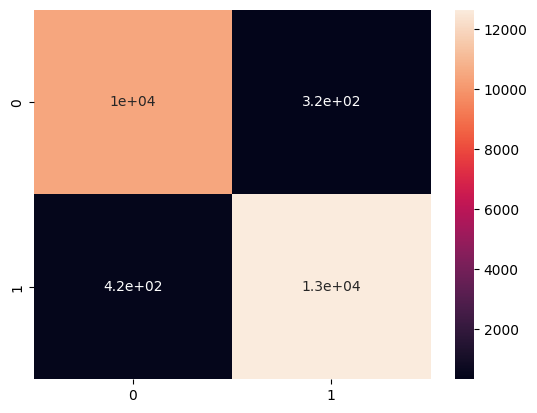

In [37]:
# show confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)